In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
import umap
import seaborn as sns
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

sys.path.append(os.path.abspath('..')) 

from utils.preproc_utils import *
from utils.plot_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
sys.path.append(os.path.abspath('..')) 
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../data/processed/'))

latent_rep_path = os.path.join(base_dir, 'latent_representation.csv')
latent_rep = pd.read_csv(latent_rep_path, index_col='customer_id')

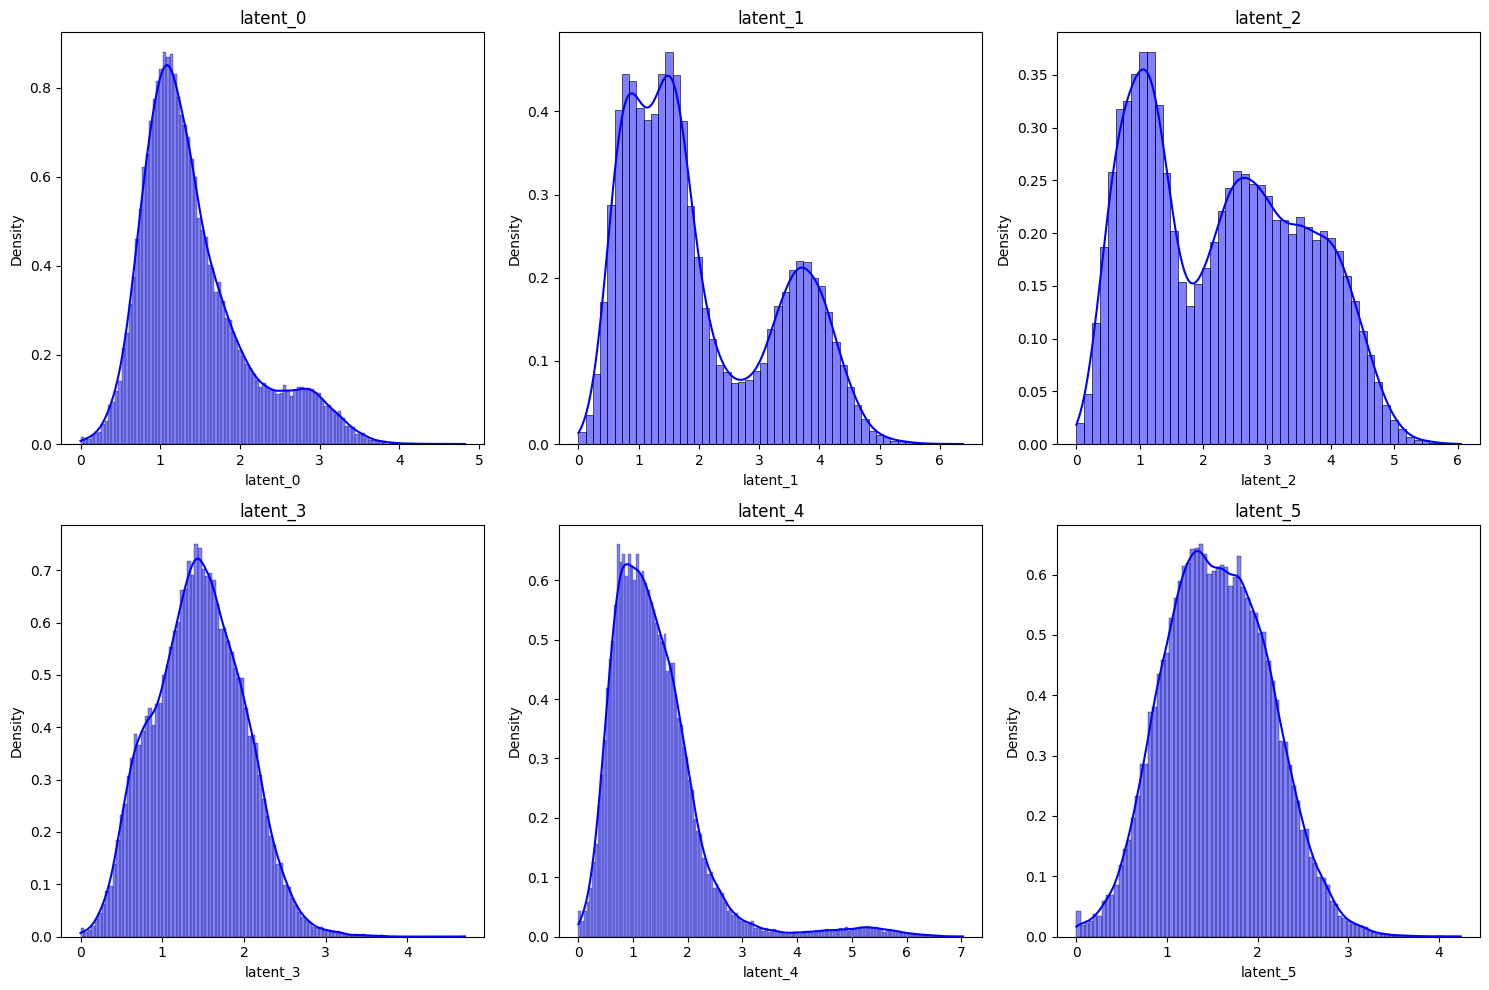

In [25]:
var_plotter(latent_rep, latent_rep.columns)

In [26]:
scaler = StandardScaler()
latent_rep_scaled = pd.DataFrame(scaler.fit_transform(latent_rep), columns=latent_rep.columns)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kme

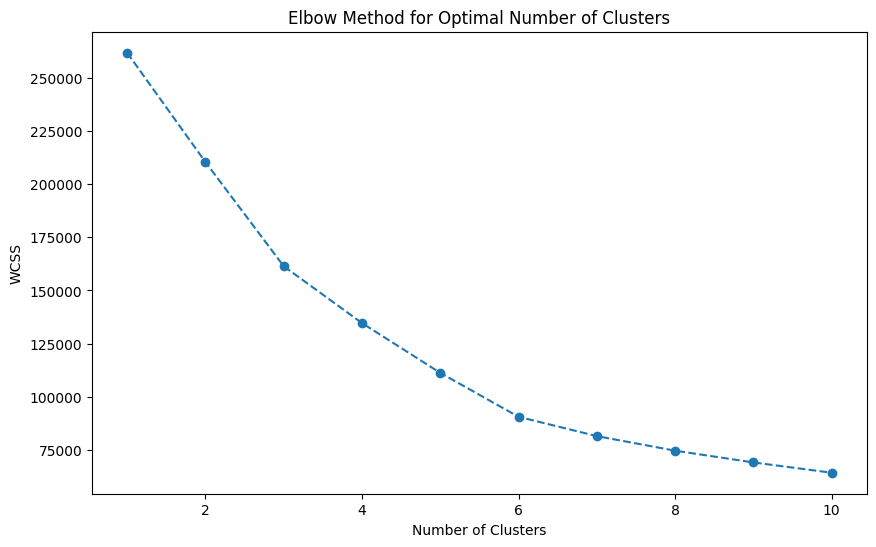

[261786.0,
 210392.72407716373,
 161406.2824360706,
 134656.8415091025,
 111237.74264869359,
 90580.05381139803,
 81499.59184603528,
 74650.13524910777,
 69115.52872288477,
 64282.165109955036]

In [27]:
plot_elbow_method(latent_rep_scaled)

**With Outliers**

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


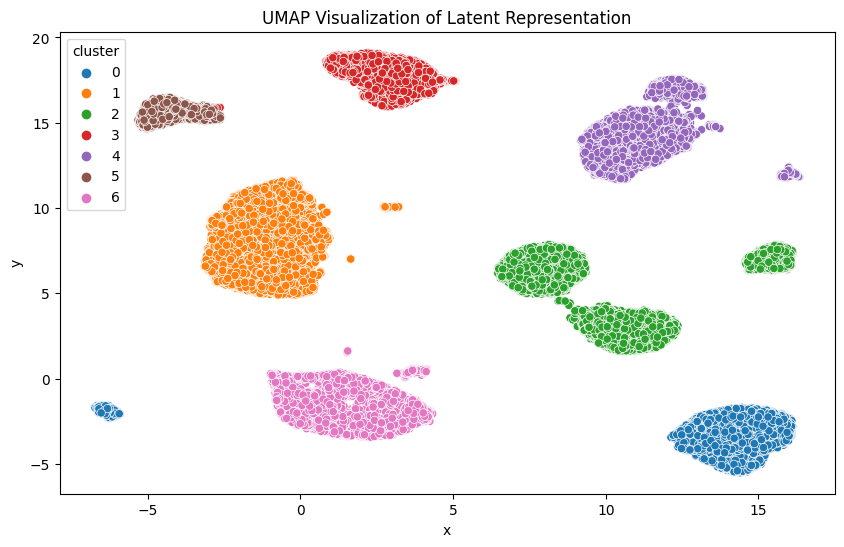

,x,y,cluster
0,14.941543,-2.776446,0
1,12.329451,17.209211,4
2,9.208262,6.711281,2
3,1.568414,1.642802,6
4,-4.595405,16.231741,5
...,...,...,...
43626,14.563020,-3.052151,0
43627,13.891803,-4.341884,0
43628,3.383058,16.842127,3
43629,-0.118683,-2.018278,6


In [39]:
kmeans_umap_visualization(latent_rep_scaled, n_clusters=7) 

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


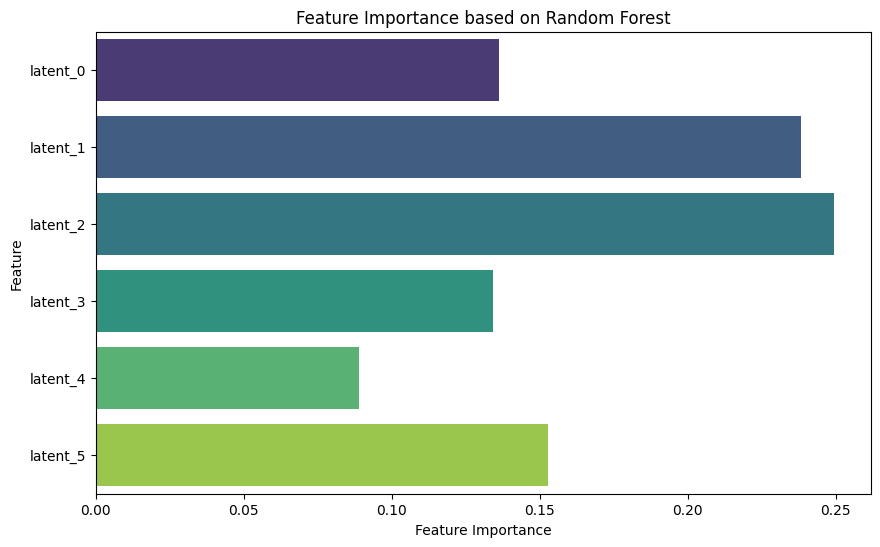

In [40]:
plot_feature_importance(latent_rep_scaled, n_clusters=7)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


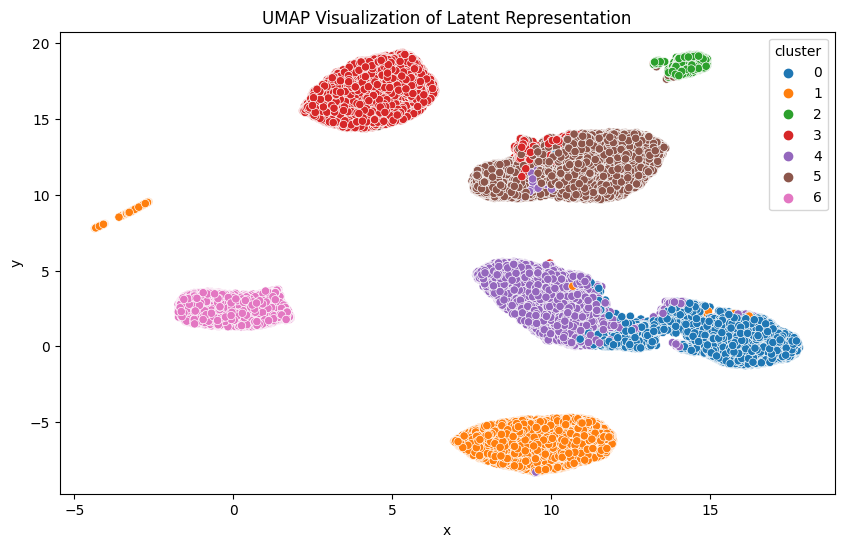

In [122]:
# apply KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(latent_rep_scaled)
latent_rep['cluster'] = kmeans.labels_
# apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_latent_rep = umap_model.fit_transform(latent_rep_scaled)
umap_latent_rep = pd.DataFrame(umap_latent_rep, columns=['x', 'y'])
umap_latent_rep['cluster'] = kmeans.labels_
# visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='cluster', data=umap_latent_rep, palette='tab10')
plt.title('UMAP Visualization of Latent Representation')
plt.show()

using df.drop(columns=spend_cols, inplace=True), n latent variables = 6, n clusters = 7, no outlier removal, minmax scaler

# **Without Using Autoencoder**

In [33]:
customer_info_noencode = pd.read_csv(os.path.join(base_dir, 'customer_info_preproc.csv'), index_col='customer_id')
customer_info_noencode.head()

,age,percentage_of_products_bought_promotion,spend_petfood,total_distinct_products,typical_hour,years_as_customer,monetary,spend_groceries_proportion,spend_electronics_proportion,spend_vegetables_proportion,spend_nonalcohol_drinks_proportion,spend_alcohol_drinks_proportion,spend_meat_proportion,spend_fish_proportion,spend_hygiene_proportion,spend_videogames_proportion
customer_id,,,,,,,,,,,,,,,,
39634,0.247228,-0.705265,0.845114,-0.766838,0.538655,0.162472,2.001660,0.255938,0.563832,-0.594713,-1.025124,-0.230365,0.033843,0.168976,-0.389121,0.454344
43460,-0.559802,0.004984,0.616587,2.610338,-0.808807,-0.529141,0.358240,-0.469339,0.051529,-0.216852,-0.555319,0.985336,0.265378,0.408442,0.874874,0.066271
23937,0.094800,-0.356629,0.630813,1.495791,-0.461345,0.319237,0.462485,-1.663095,0.944253,-0.351806,0.339370,1.358849,-0.403427,0.521154,0.078169,0.415597
2431,0.852473,0.053190,1.426866,-0.563470,0.538655,0.617811,0.139141,2.499883,-0.697481,-0.571070,-0.754121,-0.969438,-0.497739,-0.900262,-1.802824,-2.106216
10090,-1.165124,-0.122875,-0.885659,-1.041286,0.000000,-4.303993,-0.636381,-2.303908,0.171471,-1.200319,-1.561263,4.981339,-0.834629,-0.538183,0.483573,-0.417500


c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


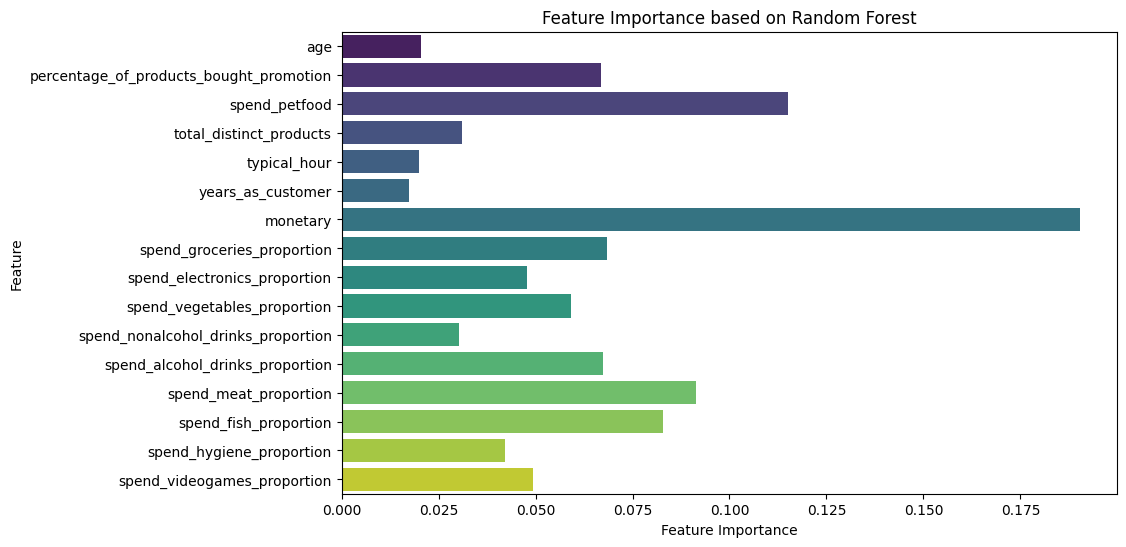

In [38]:
plot_feature_importance(customer_info_noencode, n_clusters=7)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


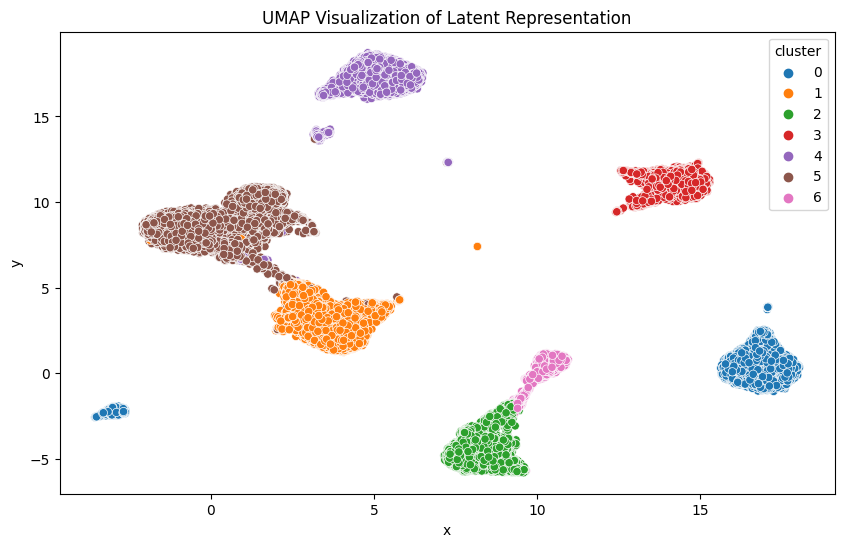

,x,y,cluster
0,16.185450,-0.607928,0
1,8.738539,-5.718562,2
2,8.816607,-5.133367,2
3,15.049664,11.786585,3
4,10.314970,1.098956,6
...,...,...,...
43626,16.271013,1.187043,0
43627,16.820688,1.294775,0
43628,13.367557,10.741190,3
43629,4.404415,17.877514,4


In [35]:
kmeans_umap_visualization(customer_info_noencode, n_clusters=7)

c:\Users\vic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


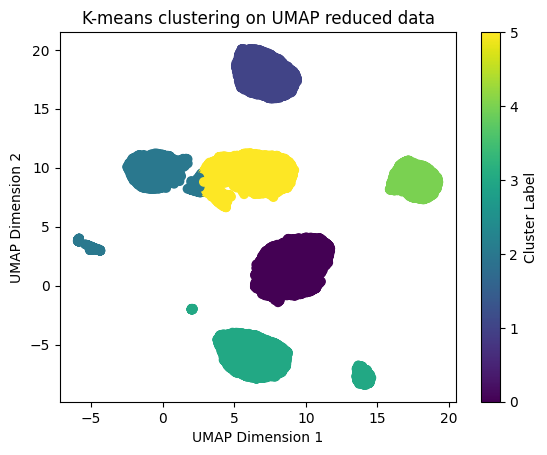

In [127]:
reducer = umap.UMAP(n_components=2)
X_reduced = reducer.fit_transform(customer_info_noencode)

kmeans = KMeans(n_clusters=6)
kmeans.fit(X_reduced)
labels = kmeans.labels_

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.title('K-means clustering on UMAP reduced data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()